In [3]:
import pandas as pd

# CSVファイルをインポート
df = pd.read_csv('data/20250208_FSW_GT86/20250208_FSW(mts)_GT86.csv')
df.head()

,Corr Dist,Corr Dist (Unstretched),Corr Speed,ABS Active,ABS Enabled,AID Allow Tire Blankets,AID Auto Blip,AID Auto Clutch,AID Auto Shift,AID Fuel Rate,...,Toe In FR,Toe In RL,Toe In RR,Turbo Boost,Wheel Angular Speed FL,Wheel Angular Speed FR,Wheel Angular Speed RL,Wheel Angular Speed RR,Wind Direction,Wind Speed
0,0,0,185.9,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.016,0.2691,0.2712,0.0,164.27,164.24,167.20,167.20,-158,0
1,1,1,186.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.018,0.2565,0.2630,0.0,164.30,164.28,167.08,167.08,-158,0
2,2,2,186.1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.061,0.2532,0.2607,0.0,164.34,164.30,167.21,167.21,-158,0
3,3,3,186.1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.082,0.2609,0.2601,0.0,164.39,164.35,167.50,167.50,-158,0
4,3,3,186.2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.086,0.2712,0.2631,0.0,164.42,164.40,167.76,167.76,-158,0


In [4]:
df.columns.tolist()

['Corr Dist',
 'Corr Dist (Unstretched)',
 'Corr Speed',
 'ABS Active',
 'ABS Enabled',
 'AID Allow Tire Blankets',
 'AID Auto Blip',
 'AID Auto Clutch',
 'AID Auto Shift',
 'AID Fuel Rate',
 'AID Ideal Line',
 'AID Mech Damage',
 'AID Stability',
 'AID Tire Wear Rate',
 'Air Density',
 'Air Temp',
 'Ballast',
 'Best Lap Delta',
 'Best Lap Time',
 'Brake Bias',
 'Brake Pos',
 'Brake Temp FL',
 'Brake Temp FR',
 'Brake Temp RL',
 'Brake Temp RR',
 'CG Accel Lateral',
 'CG Accel Longitudinal',
 'CG Accel Vertical',
 'CG Height',
 'Camber FL',
 'Camber FR',
 'Camber RL',
 'Camber RR',
 'Car Coord X',
 'Car Coord Y',
 'Car Coord Z',
 'Car Damage Front',
 'Car Damage Left',
 'Car Damage Rear',
 'Car Damage Right',
 'Car Pos Norm',
 'Caster FL',
 'Caster FR',
 'Chassis Pitch Angle',
 'Chassis Pitch Rate',
 'Chassis Roll Angle',
 'Chassis Roll Rate',
 'Chassis Velocity X',
 'Chassis Velocity Y',
 'Chassis Velocity Z',
 'Chassis Yaw Rate',
 'Clutch Pos',
 'DRS Active',
 'DRS Available',
 'Driv

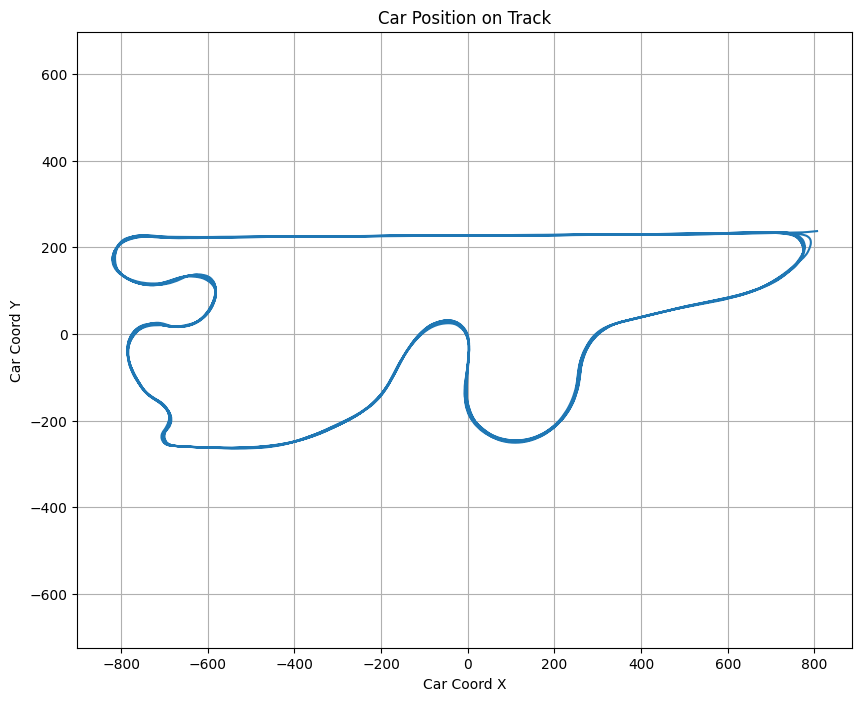

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(df['Car Coord X'], df['Car Coord Y'])
plt.xlabel('Car Coord X')
plt.ylabel('Car Coord Y')
plt.title('Car Position on Track')
plt.axis('equal')
plt.grid(True)
plt.show()

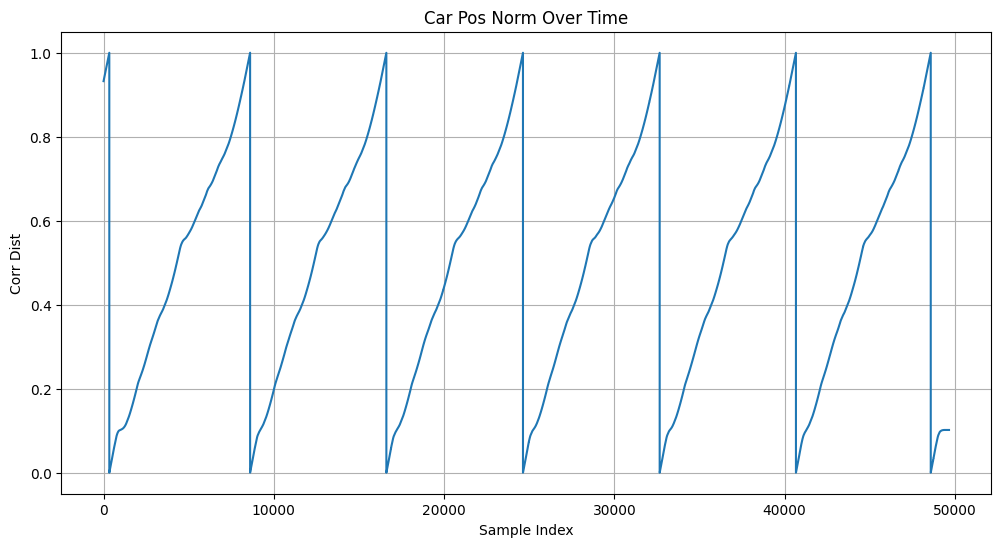

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Car Pos Norm'])
plt.xlabel('Sample Index')
plt.ylabel('Corr Dist')
plt.title('Car Pos Norm Over Time')
plt.grid(True)
plt.show()

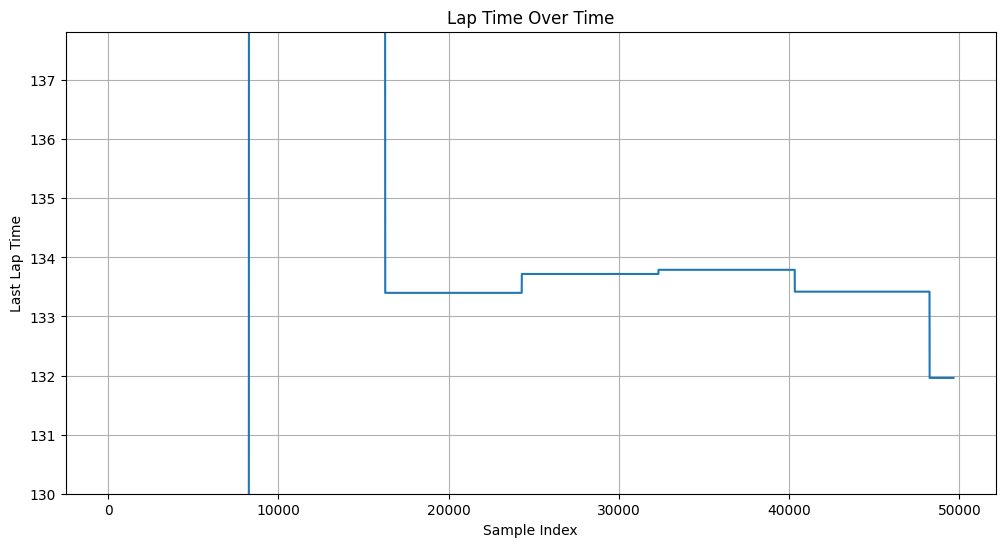

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df["Last Lap Time"])
plt.xlabel("Sample Index")
plt.ylabel("Last Lap Time")
plt.ylim(130, df["Last Lap Time"].max())
plt.title("Lap Time Over Time")
plt.grid(True)
plt.show()

In [15]:
# Get unique values from Last Lap Time column and display them
unique_lap_times = df['Last Lap Time'].unique()
print(f"Number of unique lap times: {len(unique_lap_times)}")
print("\nUnique lap times:")
print(sorted(unique_lap_times))

Number of unique lap times: 8

Unique lap times:
[np.float64(0.0), np.float64(131.96), np.float64(133.4), np.float64(133.42), np.float64(133.72), np.float64(133.79), np.float64(137.82), np.float64(nan)]


In [19]:
# Last Lap Timeの変化点でラップ境界を検出し、ラップごとに分割
lap_change = df['Last Lap Time'].ne(df['Last Lap Time'].shift()).cumsum()
laps = {f"Lap {i}": group.reset_index(drop=True) for i, (_, group) in enumerate(df.groupby(lap_change), 1)}

print(f"ラップ数: {len(laps)}")
for name, lap_df in laps.items():
    lap_time = lap_df['Last Lap Time'].iloc[-1]
    print(f"  {name}: {len(lap_df)} rows, Last Lap Time = {lap_time}")

ラップ数: 8
  Lap 1: 8268 rows, Last Lap Time = 0.0
  Lap 2: 8005 rows, Last Lap Time = 137.82
  Lap 3: 8022 rows, Last Lap Time = 133.4
  Lap 4: 8028 rows, Last Lap Time = 133.72
  Lap 5: 8005 rows, Last Lap Time = 133.79
  Lap 6: 7917 rows, Last Lap Time = 133.42
  Lap 7: 1409 rows, Last Lap Time = 131.96
  Lap 8: 1 rows, Last Lap Time = nan


In [38]:
df = laps["Lap 6"][200:2200]

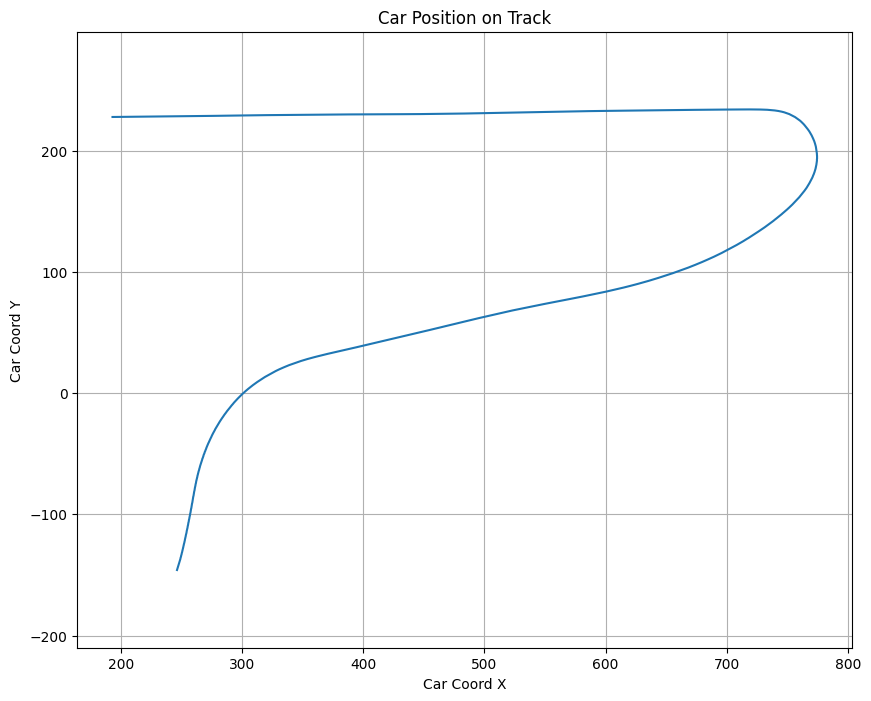

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(df['Car Coord X'], df['Car Coord Y'])
plt.xlabel('Car Coord X')
plt.ylabel('Car Coord Y')
plt.title('Car Position on Track')
plt.axis('equal')
plt.grid(True)
plt.show()

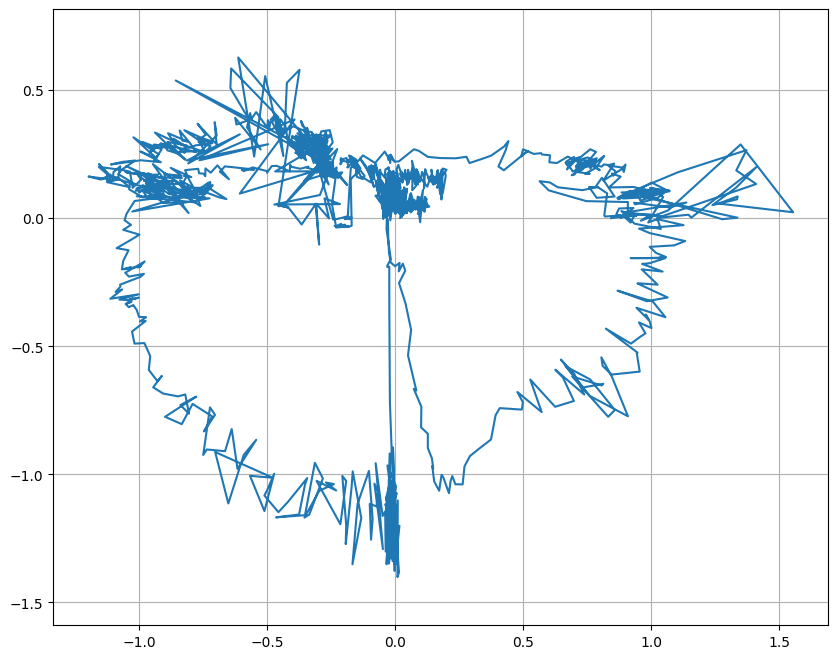

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(df['CG Accel Lateral'], df['CG Accel Longitudinal'])
plt.xlabel('CG Accel Lateral')
plt.ylabel('CG Accel Longitudinal')
plt.title('GG Diagram')
plt.axis('equal')
plt.grid(True)
plt.show()

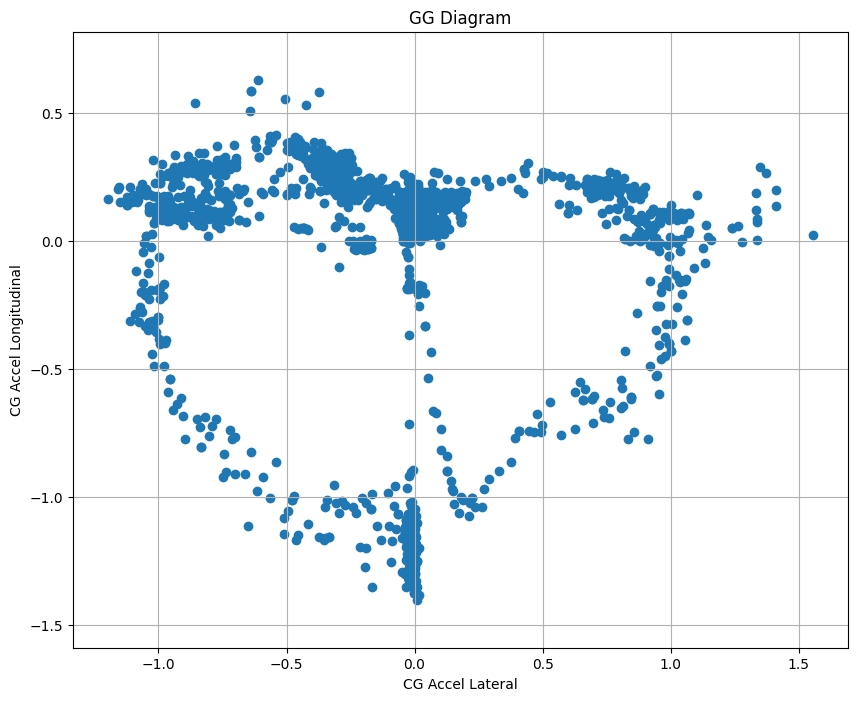

In [43]:
plt.figure(figsize=(10, 8))
plt.scatter(df['CG Accel Lateral'], df['CG Accel Longitudinal'])
plt.xlabel('CG Accel Lateral')
plt.ylabel('CG Accel Longitudinal')
plt.title('GG Diagram')
plt.axis('equal')
plt.grid(True)
plt.show()

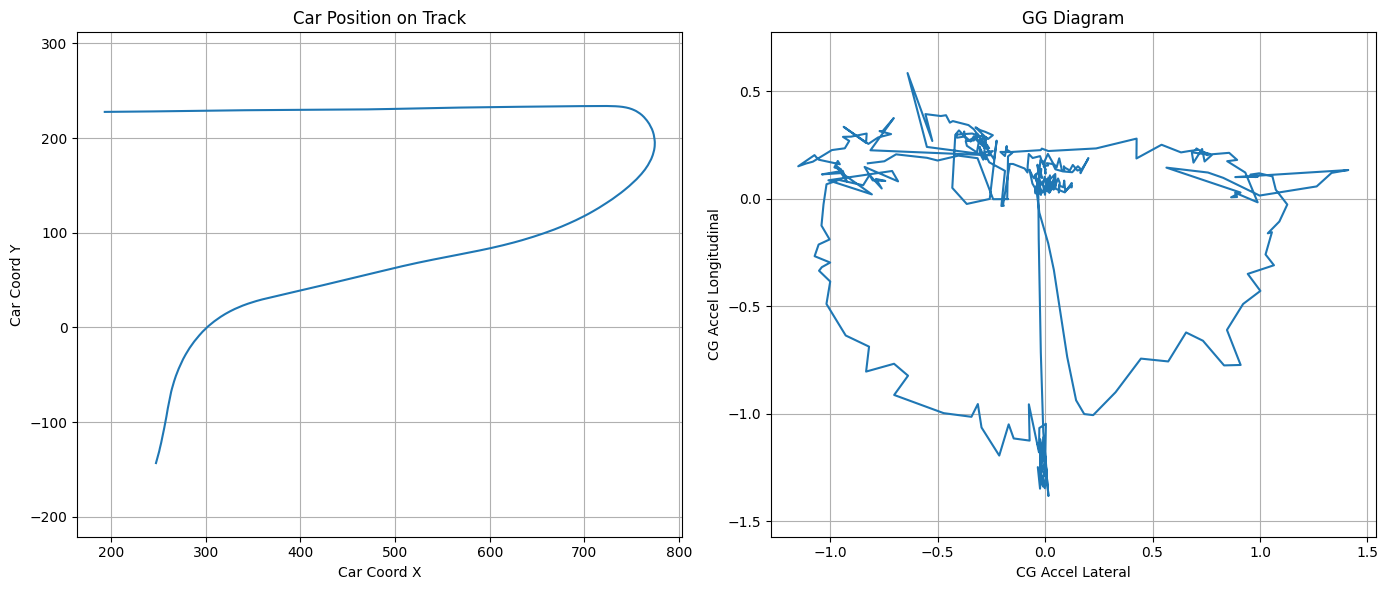

In [51]:
df = laps["Lap 6"][200:2200:5]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(df['Car Coord X'], df['Car Coord Y'])
axes[0].set_xlabel('Car Coord X')
axes[0].set_ylabel('Car Coord Y')
axes[0].set_title('Car Position on Track')
axes[0].axis('equal')
axes[0].grid(True)

axes[1].plot(df['CG Accel Lateral'], df['CG Accel Longitudinal'])
axes[1].set_xlabel('CG Accel Lateral')
axes[1].set_ylabel('CG Accel Longitudinal')
axes[1].set_title('GG Diagram')
axes[1].axis('equal')
axes[1].grid(True)

plt.tight_layout()
plt.show()

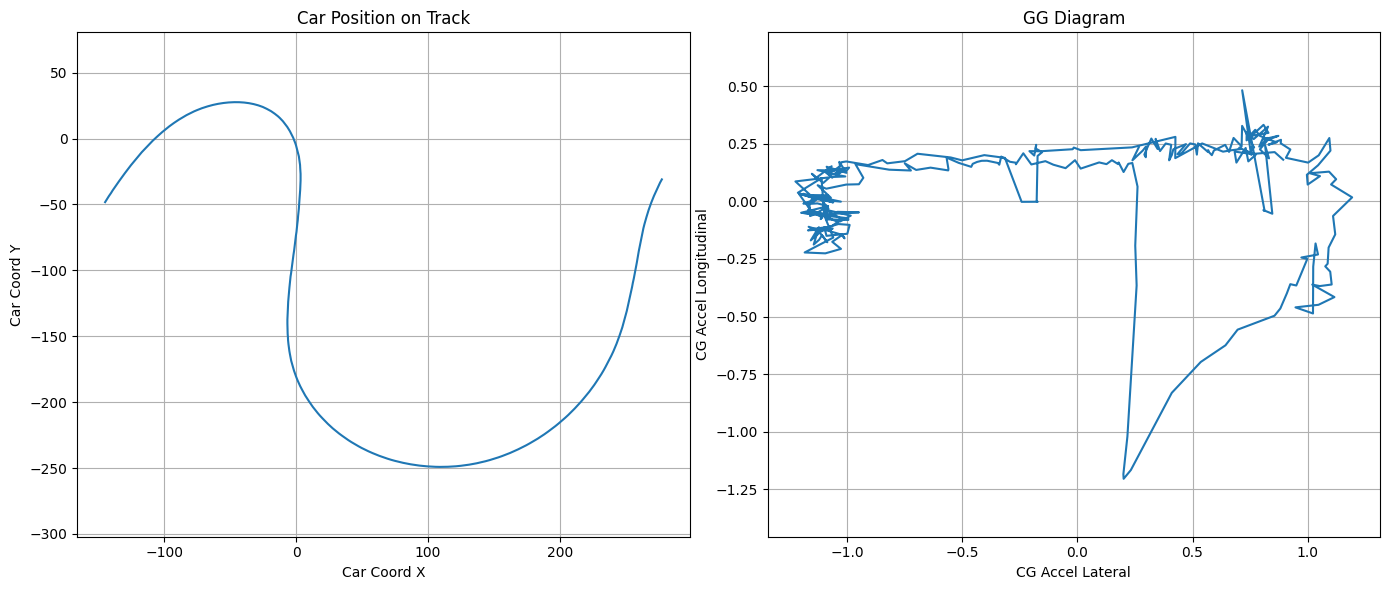

In [50]:
df = laps["Lap 6"][2000:3500:5]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(df['Car Coord X'], df['Car Coord Y'])
axes[0].set_xlabel('Car Coord X')
axes[0].set_ylabel('Car Coord Y')
axes[0].set_title('Car Position on Track')
axes[0].axis('equal')
axes[0].grid(True)

axes[1].plot(df['CG Accel Lateral'], df['CG Accel Longitudinal'])
axes[1].set_xlabel('CG Accel Lateral')
axes[1].set_ylabel('CG Accel Longitudinal')
axes[1].set_title('GG Diagram')
axes[1].axis('equal')
axes[1].grid(True)

plt.tight_layout()
plt.show()

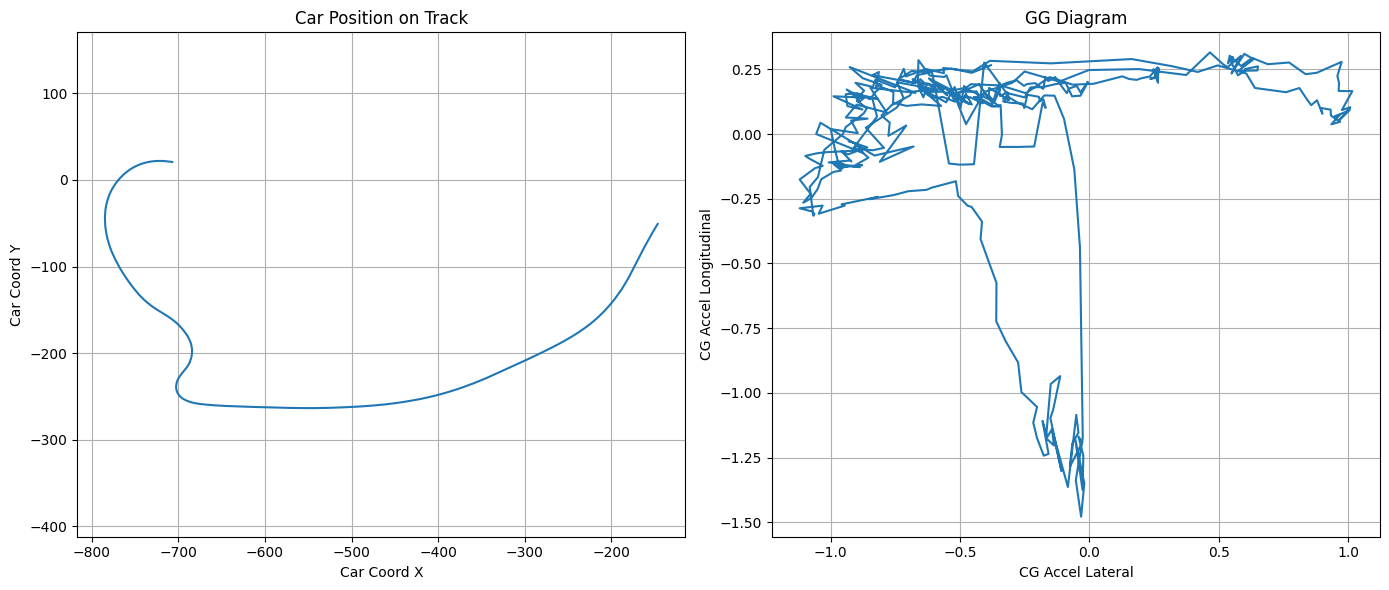

In [ ]:
df = laps["Lap 6"][3500:5000:5]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(df['Car Coord X'], df['Car Coord Y'])
axes[0].set_xlabel('Car Coord X')
axes[0].set_ylabel('Car Coord Y')
axes[0].set_title('Car Position on Track')
axes[0].axis('equal')
axes[0].grid(True)

axes[1].plot(df['CG Accel Lateral'], df['CG Accel Longitudinal'])
axes[1].set_xlabel('CG Accel Lateral')
axes[1].set_ylabel('CG Accel Longitudinal')
axes[1].set_title('GG Diagram')
axes[1].axis('equal')
axes[1].grid(True)

plt.tight_layout()
plt.show()